## Observation of various CNN architectures in object classification

Member:
- Daffa Afia Rizfazka (1301213215)
- Virdi Rizky Elnanda (1301210490)

# Library

In [10]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, ResNet50, MobileNet
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Data

In [ ]:
train_dir = r"D:\Daffa Data\Telkom Folder\semester 7\VISKOM\archive\Train"
test_dir = r"D:\Daffa Data\Telkom Folder\semester 7\VISKOM\archive\Test"

assert os.path.exists(train_dir), f"Train directory {train_dir} tidak ditemukan."
assert os.path.exists(test_dir), f"Test directory {test_dir} tidak ditemukan."


# Preprocessing Citra

In [ ]:
image_size = (224, 224)
batch_size = 32
num_classes = 10  

datagen_train = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

datagen_test = ImageDataGenerator(rescale=1.0/255.0)

In [13]:
train_generator = datagen_train.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = datagen_test.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 11016 images belonging to 10 classes.
Found 3466 images belonging to 10 classes.


# Data Samples

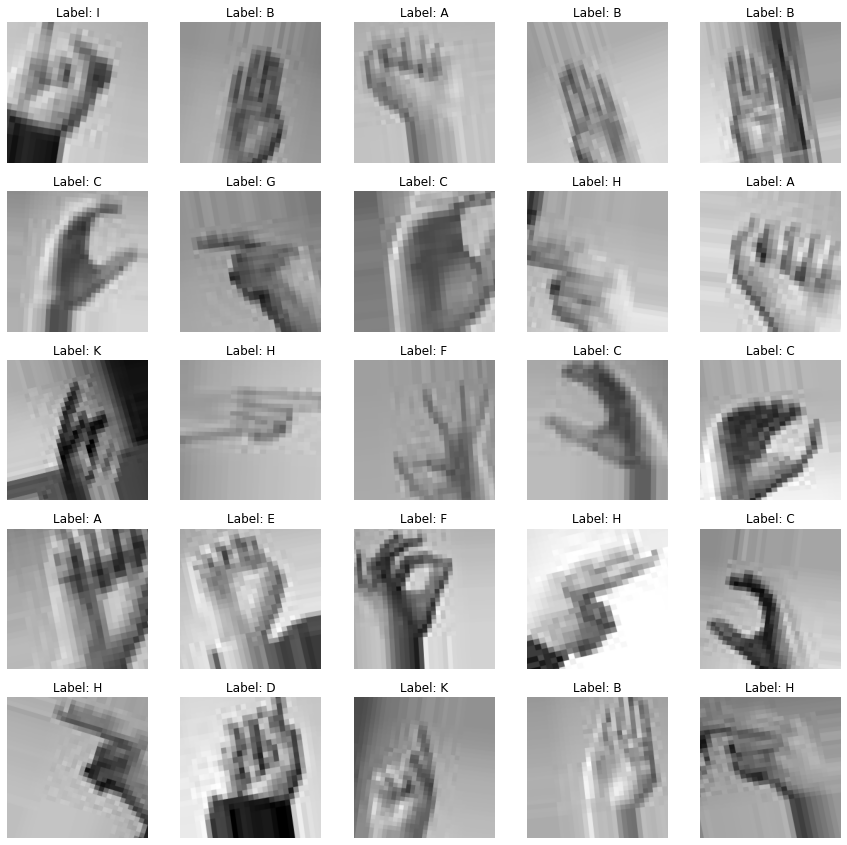

In [ ]:
def visualize_samples(generator, num_samples=25):
    class_labels = {v: k for k, v in generator.class_indices.items()} 
    
    images, labels = next(generator)
    
    plt.figure(figsize=(15, 15))
    for i in range(min(num_samples, len(images))):
        plt.subplot(5, 5, i + 1)  
        plt.imshow(images[i])
        
        class_name = class_labels[labels[i].argmax()]  
        plt.title(f"Label: {class_name}")
        plt.axis('off')
    plt.show()

visualize_samples(train_generator, num_samples=25)

# Implementation CNN Architecture

In [14]:
def build_model(base_model):
    base_model.trainable = False  
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    predictions = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    return model

In [15]:
models = {
    "VGG16": VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3)),
    "ResNet50": ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3)),
    "MobileNet": MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
}

# Train and Evaluate

Training model: VGG16
Epoch 1/5
345/345 ━━━━━━━━━━━━━━━━━━━━ 1466s 4s/step - accuracy: 0.1826 - loss: 2.2317 - val_accuracy: 0.3918 - val_loss: 1.7909
Epoch 2/5
345/345 ━━━━━━━━━━━━━━━━━━━━ 1389s 4s/step - accuracy: 0.3584 - loss: 1.7384 - val_accuracy: 0.5110 - val_loss: 1.4883
Epoch 3/5
345/345 ━━━━━━━━━━━━━━━━━━━━ 1432s 4s/step - accuracy: 0.4347 - loss: 1.5190 - val_accuracy: 0.4126 - val_loss: 1.4218
Epoch 4/5
345/345 ━━━━━━━━━━━━━━━━━━━━ 1415s 4s/step - accuracy: 0.4920 - loss: 1.3592 - val_accuracy: 0.3921 - val_loss: 1.3818
Epoch 5/5
345/345 ━━━━━━━━━━━━━━━━━━━━ 1450s 4s/step - accuracy: 0.5176 - loss: 1.2916 - val_accuracy: 0.5929 - val_loss: 1.1798
109/109 ━━━━━━━━━━━━━━━━━━━━ 326s 3s/step
Classification Report for VGG16
              precision    recall  f1-score   support

           A       0.80      0.85      0.82       331
           B       0.87      0.68      0.76       432
           C       0.60      0.97      0.74       310
           D       0.45      0.62      0.5

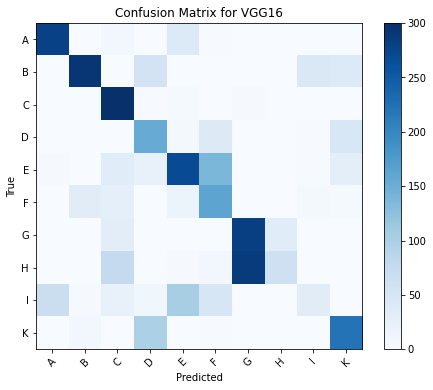

Training model: ResNet50
Epoch 1/5
345/345 ━━━━━━━━━━━━━━━━━━━━ 727s 2s/step - accuracy: 0.1057 - loss: 2.3733 - val_accuracy: 0.0681 - val_loss: 2.3073
Epoch 2/5
345/345 ━━━━━━━━━━━━━━━━━━━━ 757s 2s/step - accuracy: 0.1151 - loss: 2.2940 - val_accuracy: 0.0785 - val_loss: 2.2897
Epoch 3/5
345/345 ━━━━━━━━━━━━━━━━━━━━ 704s 2s/step - accuracy: 0.1153 - loss: 2.2764 - val_accuracy: 0.1316 - val_loss: 2.2501
Epoch 4/5
345/345 ━━━━━━━━━━━━━━━━━━━━ 652s 2s/step - accuracy: 0.1204 - loss: 2.2562 - val_accuracy: 0.1307 - val_loss: 2.2063
Epoch 5/5
345/345 ━━━━━━━━━━━━━━━━━━━━ 640s 2s/step - accuracy: 0.1274 - loss: 2.2463 - val_accuracy: 0.1746 - val_loss: 2.1868
109/109 ━━━━━━━━━━━━━━━━━━━━ 144s 1s/step
Classification Report for ResNet50
              precision    recall  f1-score   support

           A       0.00      0.00      0.00       331
           B       0.00      0.00      0.00       432
           C       0.22      0.19      0.20       310
           D       0.09      0.27      0.

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

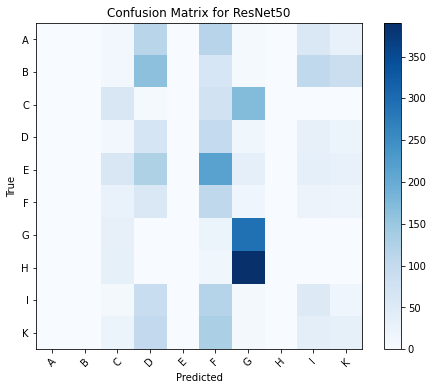

Training model: MobileNet
Epoch 1/5
345/345 ━━━━━━━━━━━━━━━━━━━━ 250s 719ms/step - accuracy: 0.4821 - loss: 1.4855 - val_accuracy: 0.8892 - val_loss: 0.3643
Epoch 2/5
345/345 ━━━━━━━━━━━━━━━━━━━━ 249s 722ms/step - accuracy: 0.8048 - loss: 0.5605 - val_accuracy: 0.9137 - val_loss: 0.2594
Epoch 3/5
345/345 ━━━━━━━━━━━━━━━━━━━━ 241s 698ms/step - accuracy: 0.8580 - loss: 0.4103 - val_accuracy: 0.9230 - val_loss: 0.2149
Epoch 4/5
345/345 ━━━━━━━━━━━━━━━━━━━━ 250s 723ms/step - accuracy: 0.8771 - loss: 0.3421 - val_accuracy: 0.9129 - val_loss: 0.2409
Epoch 5/5
345/345 ━━━━━━━━━━━━━━━━━━━━ 243s 706ms/step - accuracy: 0.8964 - loss: 0.2913 - val_accuracy: 0.9593 - val_loss: 0.1463
109/109 ━━━━━━━━━━━━━━━━━━━━ 46s 415ms/step
Classification Report for MobileNet
              precision    recall  f1-score   support

           A       0.99      0.97      0.98       331
           B       1.00      0.98      0.99       432
           C       1.00      0.99      0.99       310
           D       0.9

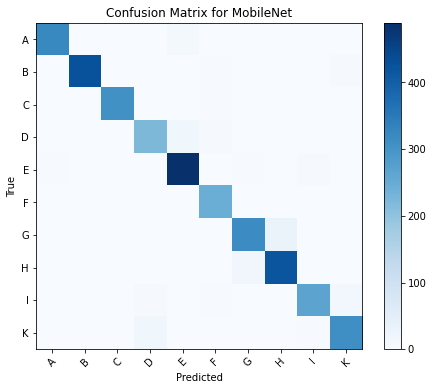

In [16]:
histories = {}
for model_name, base_model in models.items():
    print(f"Training model: {model_name}")
    model = build_model(base_model)
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(
        train_generator,
        validation_data=test_generator,
        epochs=5,  
        verbose=1
    )

    histories[model_name] = history

    test_generator.reset()
    predictions = np.argmax(model.predict(test_generator), axis=1)
    print(f"Classification Report for {model_name}")
    print(classification_report(test_generator.classes, predictions, target_names=list(test_generator.class_indices.keys())))

    cm = confusion_matrix(test_generator.classes, predictions)
    print(f"Confusion Matrix for {model_name}")
    print(cm)

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, cmap="Blues")
    plt.colorbar()
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.xticks(ticks=np.arange(num_classes), labels=list(test_generator.class_indices.keys()), rotation=45)
    plt.yticks(ticks=np.arange(num_classes), labels=list(test_generator.class_indices.keys()))
    plt.show()

# Visualization

In [17]:
def plot_history(history, model_name):
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Akurasi Model {model_name}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Loss Model {model_name}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

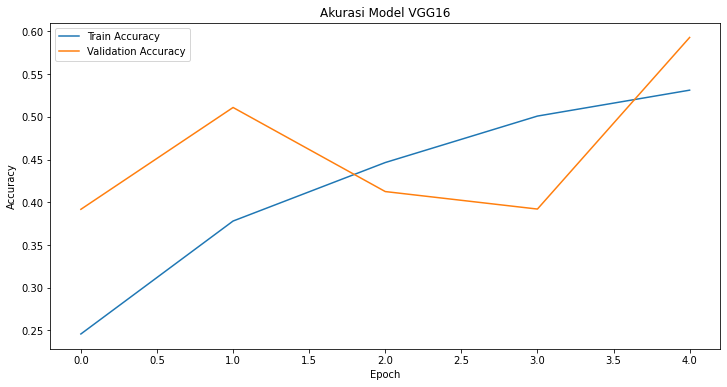

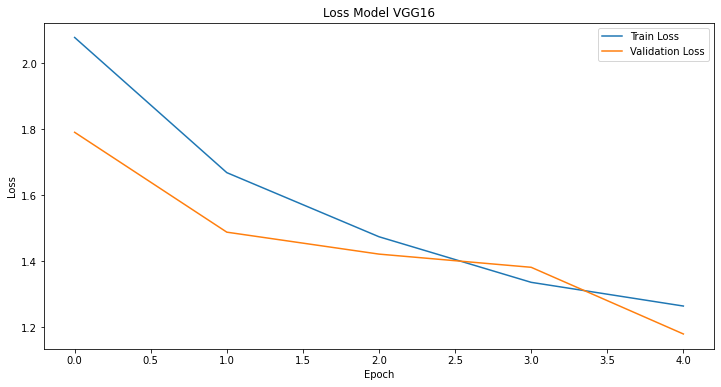

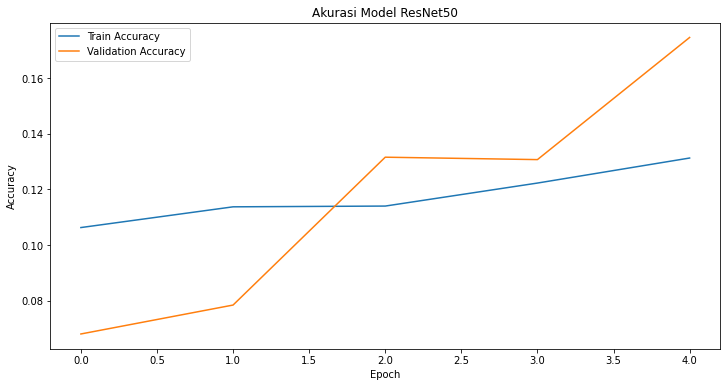

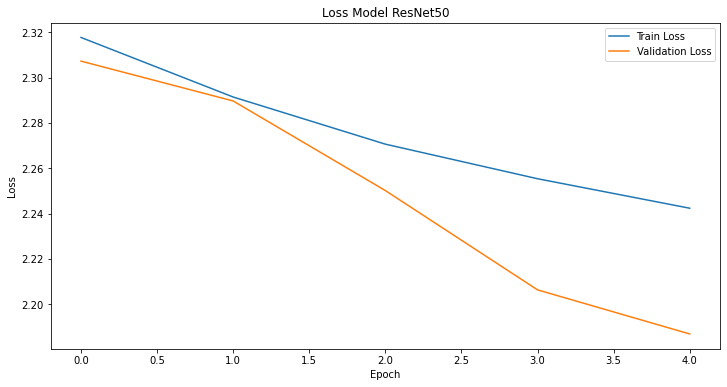

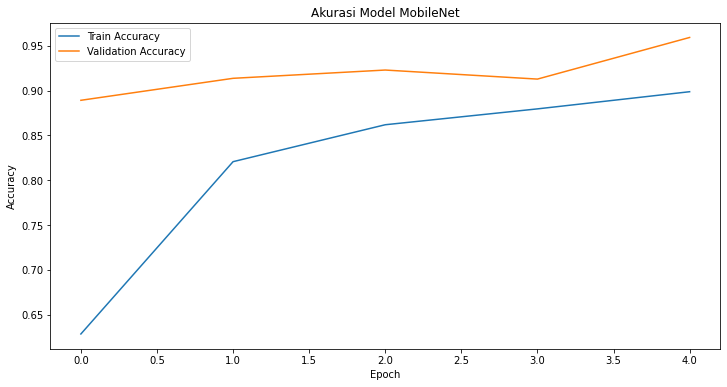

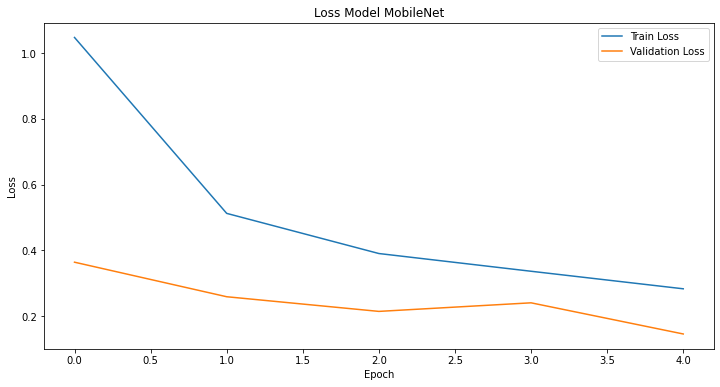

In [18]:
for model_name, history in histories.items():
    plot_history(history, model_name)